<a href="https://colab.research.google.com/github/Lzino/TIL_Today-I-Learned/blob/master/Student_Alcohol_Consumption_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

양재R&CD 입문자과정 조교 활동으로 인해 해당 competition으로 학생들을 가르칠 예정. 겸사겸사 TIL

* 해당 교육과정 : http://yangjaehub.com/newsinfo/notices/?pageid=1&mod=document&category1=%EA%B5%90%EC%9C%A1&uid=146
* Dataset : https://www.kaggle.com/uciml/student-alcohol-consumption

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
%matplotlib inline

In [0]:
# 현재 개발환경 : kaggle kernel
# We will use only student-por.csv
data = pd.read_csv('../input/student-por.csv')

# Data Overview

In [0]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [0]:
print(np.shape(data))
# (649, 33). 학생은 총 649명

(649, 33)


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

# Visualizations

## Sex

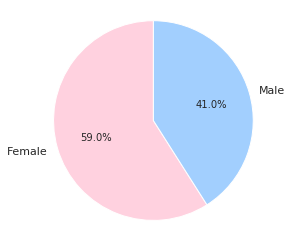

In [0]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(data['sex'].value_counts().tolist(), 
        labels=['Female', 'Male'], colors=['#ffd1df', '#a2cffe'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

성비는 남자 59%, 여자 41% 다.

## Age

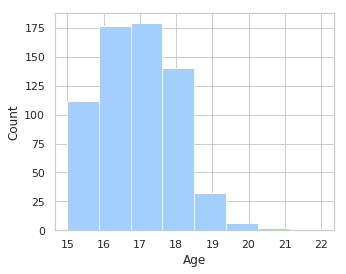

In [0]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(data['age'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Age")

연령대는 90%이상이 10대이며 주요 연령층은 16살과 17살이다.

## Weekly study time

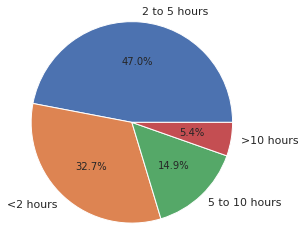

In [0]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(data['studytime'].value_counts().tolist(), 
        labels=['2 to 5 hours', '<2 hours', '5 to 10 hours', '>10 hours'], 
        autopct='%1.1f%%', startangle=0)
axis = plt.axis('equal')

학습시간은 2시간 ~ 5시간이 47%로 기록, 그 다음 2시간 미만 공부가 32.7% 기록

## Romantic Relationship

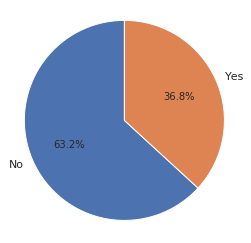

In [0]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(data['romantic'].value_counts().tolist(), 
        labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

연애는 36.8%만 하고 있다.

## Alcohol Consumption and other features

알콜 소비량과 건강에 대한 지수의 속성을 아래와 같다.

* Workday alcohol consumption: number from 1 (very low) to 5 (very high)<br/>
* Weekend alcohol consumption: number from 1 (very low) to 5 (very high)<br/>
* Health - current health status: number from 1 (very bad) to 5 (very good) 

### Weekend Alcohol Consumption Distribution

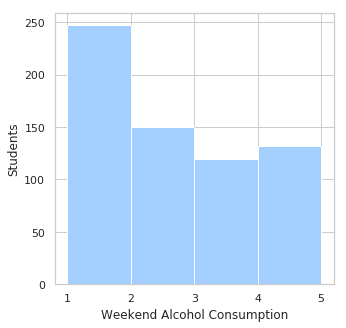

In [0]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.distplot(data['Walc'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=4)
ax = ax.set(ylabel="Students", xlabel="Weekend Alcohol Consumption")

### Alcohol Consumption and Health

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


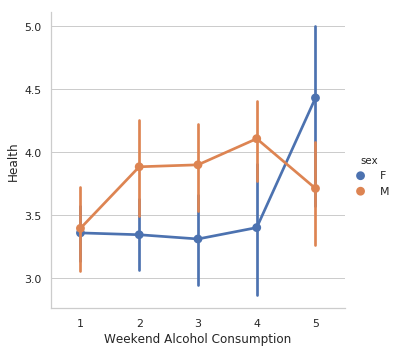

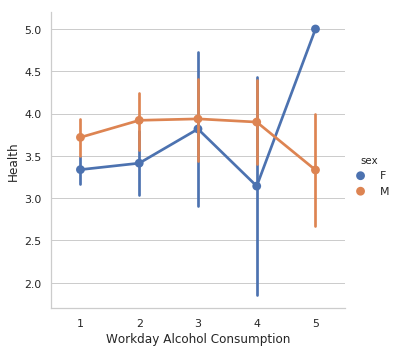

In [0]:
plot1 = sns.factorplot(x="Walc", y="health", hue="sex", data=data)
plot1.set(ylabel="Health", xlabel="Weekend Alcohol Consumption")

plot2 = sns.factorplot(x="Dalc", y="health", hue="sex", data=data)
plot2.set(ylabel="Health", xlabel="Workday Alcohol Consumption")

알콜소비량이 많으면 건강이 나쁠 것 같다는 일반적인 상식과 다르게 건강할수록 알콜소비량이 많았다. 이런 경향은 5단계의 여성에게 두드러졌다

### Alcohol Consumption and Final Grade

성적에 대한 지수는 아래와 같다.

* Final grade: number from 0 to 20.

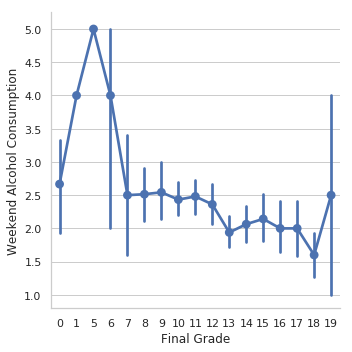

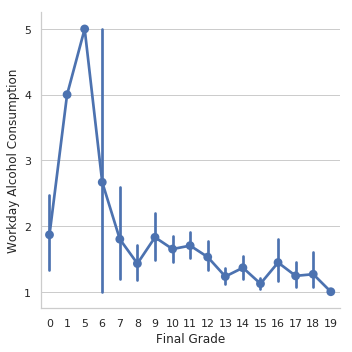

In [0]:
plot1 = sns.factorplot(x="G3", y="Walc", data=data)
plot1.set(ylabel="Weekend Alcohol Consumption", xlabel="Final Grade")

plot2 = sns.factorplot(x="G3", y="Dalc", data=data)
plot2.set(ylabel="Workday Alcohol Consumption", xlabel="Final Grade")

참조한 원문은 틀려서 새로 고침.

Workday Alchol Consumption과 Weekend Alchol Consumption은 모두 성적이 높을수록 알콜을 적게 섭취한다.

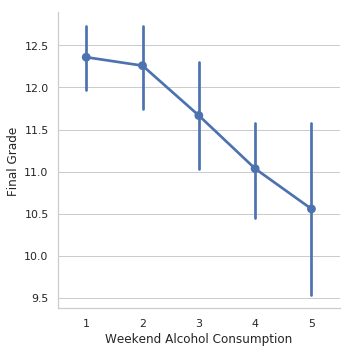

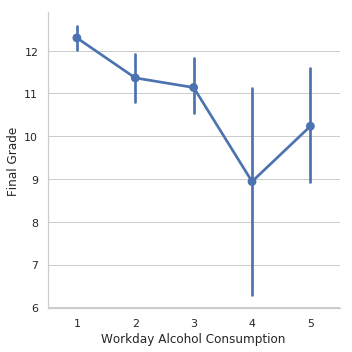

In [0]:
plot1 = sns.factorplot(x="Walc", y="G3", data=data)
plot1.set(ylabel="Final Grade", xlabel="Weekend Alcohol Consumption") 

plot2 = sns.factorplot(x="Dalc", y="G3", data=data)
plot2.set(ylabel="Final Grade", xlabel="Workday Alcohol Consumption")

X값과 Y값을 반대로 바꾸어보면 의도했던 인과관계가 더 명확하게 보인다.

* 알콜 소비량이 클수록 특히 Weekend Alchol Consumption이 많을수록 성적은 떨어진다.

# Final Grade Prediction

이제 4개의 regression 모델을 사용해서 final grade를 예측하는 실험을 할 것이다.

* Algorithm : decision tree regression, linear regression, lasso and ridge regression.
* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

## With G1 and G2 features

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [0]:
y = data['G3']
X = data.drop(['G3'], axis=1)

In [0]:
X = pd.get_dummies(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
521,16,2,3,2,2,0,3,3,3,1,...,0,1,0,1,0,1,0,1,1,0
178,17,1,1,4,2,0,5,3,5,1,...,0,1,0,1,1,0,1,0,0,1
260,16,1,2,1,1,0,5,3,5,1,...,1,0,0,1,1,0,0,1,1,0
153,15,4,4,1,3,0,4,2,2,1,...,0,1,0,1,0,1,0,1,1,0
75,15,4,3,1,2,0,4,3,3,2,...,0,1,0,1,0,1,0,1,1,0


In [0]:
y_train.head()

521    10
178     8
260    11
153    13
75     11
Name: G3, dtype: int64

### Modeling

In [0]:
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)
#cross_val_score(tree, X_train, y_train, cv=5)
print("DecisionTreeRegressor 훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("DecisionTreeRegressor 테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

DecisionTreeRegressor 훈련 세트 정확도: 1.000
DecisionTreeRegressor 테스트 세트 정확도: 0.574


In [0]:
LR = LinearRegression()
LR.fit(X_train, y_train)
print("LinearRegression 훈련 세트 정확도: {:.3f}".format(LR.score(X_train, y_train)))
print("LinearRegression 테스트 세트 정확도: {:.3f}".format(LR.score(X_test, y_test)))

LinearRegression 훈련 세트 정확도: 0.848
LinearRegression 테스트 세트 정확도: 0.865


In [0]:
rg = Ridge()
rg.fit(X_train, y_train)
print("Ridge Regression 훈련 세트 정확도: {:.3f}".format(rg.score(X_train, y_train)))
print("Ridge Regression 테스트 세트 정확도: {:.3f}".format(rg.score(X_test, y_test)))

Ridge Regression 훈련 세트 정확도: 0.848
Ridge Regression 테스트 세트 정확도: 0.865


In [0]:
ls = Lasso()
ls.fit(X_train, y_train)
print("Lasso Regression 훈련 세트 정확도: {:.3f}".format(ls.score(X_train, y_train)))
print("Lasso Regression 테스트 세트 정확도: {:.3f}".format(ls.score(X_test, y_test)))

Lasso Regression 훈련 세트 정확도: 0.816
Lasso Regression 테스트 세트 정확도: 0.881


### Usage of Cross validation 
제일 성능이 좋았던 Lasso 알고리즘을 cross validation을 사용하여 검증해보자

In [0]:
scores = cross_val_score(ls, X, y, cv=5)
print('cross-val-score \n{}'.format(scores))
print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))

cross-val-score 
[0.83129668 0.74947796 0.84278436 0.88378169 0.7640708 ]
cross-val-score.mean 
0.814


In [0]:
# 클래스 비율 맞춰서 고르게 나누는 방법
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
scores2 = cross_val_score(ls, X, y, cv=skf)
print('cross-val-score \n{}'.format(scores2))
print('cross-val-score.mean \n{:.3f}'.format(scores2.mean()))

cross-val-score 
[0.75827129 0.90187166 0.86045833 0.88321289 0.75913873]
cross-val-score.mean 
0.833


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


## Feature Importances

각각 알고리즘의 성능을 알아보았으니 이제 Feature Importance를 알아보자 

In [0]:
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

1. Feature G2 (0.823206)
2. Feature studytime (0.022337)
3. Feature Mjob_other (0.017840)
4. Feature Medu (0.015771)
5. Feature Fedu (0.014399)
6. Feature G1 (0.012755)
7. Feature reason_other (0.012643)
8. Feature absences (0.012568)
9. Feature freetime (0.011123)
10. Feature nursery_yes (0.006492)
11. Feature goout (0.005440)
12. Feature famrel (0.005370)
13. Feature traveltime (0.004749)
14. Feature age (0.004682)
15. Feature Walc (0.003928)
16. Feature school_MS (0.002626)
17. Feature Dalc (0.002380)
18. Feature health (0.002192)
19. Feature guardian_other (0.002077)
20. Feature reason_reputation (0.002040)
21. Feature romantic_yes (0.001996)
22. Feature famsize_GT3 (0.001961)
23. Feature sex_F (0.001420)
24. Feature reason_home (0.001352)
25. Feature address_U (0.001207)
26. Feature activities_no (0.001027)
27. Feature schoolsup_yes (0.000697)
28. Feature Fjob_other (0.000669)
29. Feature Fjob_at_home (0.000578)
30. Feature famsup_yes (0.000511)
31. Feature schoolsup_no (0.000414)

G2의 영향(82%)이 매우 강하다는 걸 알 수 있다. 

성능에 미치는 영향을 직접적으로 확인해보기 위해 성적 data 없이 G3를 각각 예측하는 알고리즘을 짜보자. 더불어 G1, G2도 예측해보자

## Without G1 and G2 features, predict G1 & G2 & G3

In [0]:
X2 = data.drop(['G3', 'G2', 'G1'], axis=1)

In [0]:
X2 = pd.get_dummies(X2)
y2 = data['G1']
y3 = data['G2']
# y는 이미 G3

In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y2, test_size=0.33, random_state=42) # G1
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y3, test_size=0.33, random_state=42) # G2
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y, test_size=0.33, random_state=42) # G3

### Final grade(G3) prediction without G1 & G2

In [0]:
ls3 = Lasso()
ls3.fit(X_train3, y_train3)
print("Lasso Regression & G3 훈련 세트 정확도: {:.3f}".format(ls3.score(X_train3, y_train3)))
print("Lasso Regression & G3 테스트 세트 정확도: {:.3f}".format(ls3.score(X_test3, y_test3)))

Lasso Regression & G3 훈련 세트 정확도: 0.000
Lasso Regression & G3 테스트 세트 정확도: -0.010


In [0]:
tree3 = DecisionTreeRegressor(random_state=0)
tree3.fit(X_train3, y_train3)
print("DecisionTreeRegressor & G3 훈련 세트 정확도: {:.3f}".format(tree3.score(X_train3, y_train3)))
print("DecisionTreeRegressor & G3 테스트 세트 정확도: {:.3f}".format(tree3.score(X_test3, y_test3)))

DecisionTreeRegressor & G3 훈련 세트 정확도: 1.000
DecisionTreeRegressor & G3 테스트 세트 정확도: -0.425


In [0]:
rg3 = Ridge()
rg3.fit(X_train3, y_train3)
print("Ridge Regression & G3 훈련 세트 정확도: {:.3f}".format(rg3.score(X_train3, y_train3)))
print("Ridge Regression & G3 테스트 세트 정확도: {:.3f}".format(rg3.score(X_test3, y_test3)))

Ridge Regression & G3 훈련 세트 정확도: 0.387
Ridge Regression & G3 테스트 세트 정확도: 0.223


In [0]:
LR3 = LinearRegression()
LR3.fit(X_train3, y_train3)
print("LinearRegression & G3 훈련 세트 정확도: {:.3f}".format(LR3.score(X_train3, y_train3)))
print("LinearRegression & G3 테스트 세트 정확도: {:.3f}".format(LR3.score(X_test3, y_test3)))

LinearRegression & G3 훈련 세트 정확도: 0.387
LinearRegression & G3 테스트 세트 정확도: 0.220


### G1 & G2 prediction

가장 성능이 잘 나왔던 ridge regression으로 G1, G2도 예측해보자

In [0]:
rg1 = Ridge()
rg1.fit(X_train1, y_train1)
print("Ridge Regression & G1 훈련 세트 정확도: {:.3f}".format(rg1.score(X_train1, y_train1)))
print("Ridge Regression & G1 테스트 세트 정확도: {:.3f}".format(rg1.score(X_test1, y_test1)))

Ridge Regression & G1 훈련 세트 정확도: 0.407
Ridge Regression & G1 테스트 세트 정확도: 0.186


In [0]:
rg2 = Ridge()
rg2.fit(X_train2, y_train2)
print("Ridge Regression & G2 훈련 세트 정확도: {:.3f}".format(rg2.score(X_train2, y_train2)))
print("Ridge Regression & G2 테스트 세트 정확도: {:.3f}".format(rg2.score(X_test2, y_test2)))

Ridge Regression & G2 훈련 세트 정확도: 0.403
Ridge Regression & G2 테스트 세트 정확도: 0.164


* 실험 분석 결과  
L2 regularization을 사용하는 Ridge는 계수값을 줄이면서 Feature들간의 영향을 줄이는 역할을 하기에 G2 feature를 제거해도 상대적으로 강건한(robust) 반면,
 L1 regularization을 사용하는 Lasso는 변수들끼리 correlate할때 단 한개의 변수만 채택하고 다른 계수를 0으로 바꾼다. 그만큼 상관성이 많이 작용하는 알고리즘이라 정확도가 마이너스를 기록.
Decision Tree는 Overfitting에 대한 취약성을 여실히 보여주었다.


* Code Reference : https://www.kaggle.com/dmitriy19/basic-eda-and-final-grade-prediction